In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from pathlib import Path
from PIL import Image
from shutil import copy
from tqdm.auto import tqdm

The `list.txt` from the dataset describes the cat and dog images as follows:
> All images with 1st letter as captial are cat images.

> Images with small first letter are dog images.

In [2]:
imgs_path = Path('./oxford-iiit-pet/images/')
cat_images = list(imgs_path.glob('[(A-Z)]*.jpg'))
dog_images = list(imgs_path.glob('[(a-z)]*.jpg'))

print(f"{len(cat_images)} Cat Images.")
print(f"{len(dog_images)} Dog Images.")

2400 Cat Images.
4990 Dog Images.


In [4]:
class_names = {' '.join(p.name.split('_')[:-1])
               for p in imgs_path.glob('*.jpg')}
breeds = {br_name: [] for br_name in class_names}
breeds

{'British Shorthair': [],
 'leonberger': [],
 'scottish terrier': [],
 'Bombay': [],
 'newfoundland': [],
 'Egyptian Mau': [],
 'american pit bull terrier': [],
 'chihuahua': [],
 'great pyrenees': [],
 'samoyed': [],
 'Ragdoll': [],
 'keeshond': [],
 'shiba inu': [],
 'Sphynx': [],
 'havanese': [],
 'Russian Blue': [],
 'basset hound': [],
 'Abyssinian': [],
 'Maine Coon': [],
 'pug': [],
 'wheaten terrier': [],
 'english cocker spaniel': [],
 'beagle': [],
 'english setter': [],
 'american bulldog': [],
 'Birman': [],
 'Siamese': [],
 'staffordshire bull terrier': [],
 'Persian': [],
 'yorkshire terrier': [],
 'japanese chin': [],
 'pomeranian': [],
 'german shorthaired': [],
 'Bengal': [],
 'saint bernard': [],
 'miniature pinscher': [],
 'boxer': []}

In [5]:
len(breeds)

37

In [6]:
for p in imgs_path.glob('*.jpg'):
    br_name = ' '.join(p.name.split('_')[:-1])
    breeds[br_name].append(p)
breeds['Abyssinian'][:10]

[PosixPath('oxford-iiit-pet/images/Abyssinian_1.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_10.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_100.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_101.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_102.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_103.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_104.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_105.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_106.jpg'),
 PosixPath('oxford-iiit-pet/images/Abyssinian_107.jpg')]

Random cat image.

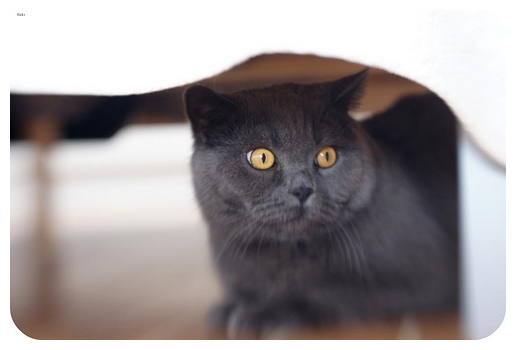

In [7]:
random.seed(777)
with Image.open(random.choice(cat_images)) as img:
    plt.imshow(img)
    plt.axis(False)

Random dog image.

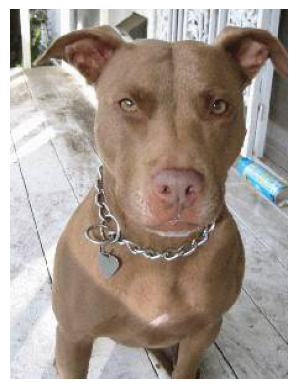

In [8]:
random.seed(777)
with Image.open(random.choice(dog_images)) as img:
    plt.imshow(img)
    plt.axis(False)

In [12]:
data_path = Path('../Cat-Dog-B/data/restrc-oxford-iiit-pet')
data_path.mkdir(parents=True, exist_ok=True)

train_path = data_path / 'train'
train_path.mkdir(parents=True, exist_ok=True)
eval_path = data_path / 'eval'
eval_path.mkdir(parents=True, exist_ok=True)
test_path = data_path / 'test'
test_path.mkdir(parents=True, exist_ok=True)

random.seed(777)
for breed, imgs in tqdm(breeds.items()):
    tr_path = train_path / breed
    tr_path.mkdir(parents=True, exist_ok=True)
    e_path = eval_path / breed
    e_path.mkdir(parents=True, exist_ok=True)
    ts_path = test_path / breed
    ts_path.mkdir(parents=True, exist_ok=True)
    
    shuf_imgs = random.sample(imgs, k=len(imgs))
    train_imgs = shuf_imgs[:50]
    eval_imgs = shuf_imgs[50:100]
    test_imgs = shuf_imgs[100:]
    
    for img in train_imgs:
        path = tr_path / img.name
        copy(img, path)
    for img in eval_imgs:
        path = e_path / img.name
        copy(img, path)
    for img in test_imgs:
        path = ts_path / img.name
        copy(img, path)

  0%|          | 0/37 [00:00<?, ?it/s]